In [385]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [392]:
experiment_id = "OluRn0JuRByPqnvX7p5AFw"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)

In [393]:
df = experiment.get_scalars()
df

,run,tag,step,value
0,no_mask01_fine-150_batch-8_lr-0001/train,batch_auc,1,0.363281
1,no_mask01_fine-150_batch-8_lr-0001/train,batch_auc,2,0.525391
2,no_mask01_fine-150_batch-8_lr-0001/train,batch_auc,3,0.442274
3,no_mask01_fine-150_batch-8_lr-0001/train,batch_auc,4,0.392334
4,no_mask01_fine-150_batch-8_lr-0001/train,batch_auc,5,0.461719
...,...,...,...,...
153571,reduced01_fine-384_batch-8_lr-001/train,epoch_precision,4,0.389706
153572,reduced01_fine-384_batch-8_lr-001/train,epoch_precision,5,0.447205
153573,reduced01_fine-384_batch-8_lr-001/train,epoch_precision,6,0.414414
153574,reduced01_fine-384_batch-8_lr-001/train,epoch_precision,7,0.450980


In [304]:
df.to_csv('/home/mr1142/Documents/Data/logs/fit/tensorboard_data.csv')

# Sacar datos del dataframe

In [305]:
import numpy as np
import re
from itertools import chain

In [336]:
def sacar_datos(nombre):
    columnas = {}
    title = list(chain.from_iterable(list(map(lambda x: re.split('/', x), re.split('_', nombre)))))
    for col in ['fine', 'batch', 'lr']:
        value = [title[i] for i in range(len(title)) if bool(re.search(col, title[i]))]
        columnas[col] = re.split('-', value[0])[1]
    columnas['train_val'] = title[-1]
    return columnas

In [337]:
def unificar_dict(dic_list):
    new = {}
    for k in dic_list[0].keys():
        new[k] = []
        for di in dic_list:
            new[k].append(di[k])
    return new

In [338]:
titulos = unificar_dict([sacar_datos(df['run'][i]) for i in range(len(df))])

In [339]:
for k in titulos.keys():
    df[k] = titulos[k]

In [340]:
df.head()

,run,tag,step,value,name,fine,batch,lr,train_val
0,no_mask01_fine-150_batch-8_lr-0001/train,batch_auc,1,0.363281,no,150,8,0001,train
1,no_mask01_fine-150_batch-8_lr-0001/train,batch_auc,2,0.525391,no,150,8,0001,train
2,no_mask01_fine-150_batch-8_lr-0001/train,batch_auc,3,0.442274,no,150,8,0001,train
3,no_mask01_fine-150_batch-8_lr-0001/train,batch_auc,4,0.392334,no,150,8,0001,train
4,no_mask01_fine-150_batch-8_lr-0001/train,batch_auc,5,0.461719,no,150,8,0001,train


# Sacar datos del validation

Lo unifico en una sola fila por batch

In [352]:
df_val = df[df.train_val == 'validation'].reset_index()

In [353]:
def unificar(name, tipo):
    return df[(df.run == name) & (df.tag == tipo)].reset_index()

In [354]:
df_new = pd.DataFrame({'run':[], 'step':[], 'name':[], 'fine':[], 'batch':[], 
                       'lr':[], 'train_val':[], 'epoch_auc':[], 'epoch_binary_accuracy':[], 
                       'epoch_loss':[], 'epoch_precision':[]})
dfs = []
for name in np.unique(df_val['run']):
    d = df_val[df_val.run == name]
    new = unificar(name, 'epoch_auc')
    for tipo in np.unique(d['tag']):
        temp = unificar(name, tipo)
        new[tipo] = list(temp['value'])
    dfs.append(new)

In [355]:
df_val = pd.concat(dfs, ignore_index = True)
df_val.pop('tag')
df_val.pop('value')

0      0.548065
1      0.568961
2      0.619600
3      0.615570
4      0.554042
         ...   
618    0.635790
619    0.635789
620    0.635789
621    0.635789
622    0.635790
Name: value, Length: 623, dtype: float64

In [356]:
index = [i for i in df.index if bool(re.search('softmax', df.run[i]))]

In [376]:
def search(nombre, string):
    if bool(re.search(nombre, string)):
        return 1
    else:
        return 0

In [377]:
for nombres in ['mask', 'softmax', 'reduced']:
    df_val[nombres] = list(map(lambda x: search(nombres, x), df_val.run))

In [378]:
df_val.head()

,index,run,step,name,fine,batch,lr,train_val,epoch_auc,epoch_binary_accuracy,epoch_loss,epoch_precision,mask,softmax,reduced
0,6588,no_mask01_fine-150_batch-8_lr-0001/validation,0,no,150,8,0001,validation,0.548065,0.666667,0.655444,0.00,1,0,0
1,6589,no_mask01_fine-150_batch-8_lr-0001/validation,1,no,150,8,0001,validation,0.568961,0.666667,0.672617,0.00,1,0,0
2,6590,no_mask01_fine-150_batch-8_lr-0001/validation,2,no,150,8,0001,validation,0.619600,0.626667,0.637227,0.44,1,0,0
3,6591,no_mask01_fine-150_batch-8_lr-0001/validation,3,no,150,8,0001,validation,0.615570,0.666667,0.619008,0.00,1,0,0
4,6592,no_mask01_fine-150_batch-8_lr-0001/validation,4,no,150,8,0001,validation,0.554042,0.666667,0.633447,0.00,1,0,0


In [379]:
df_val.to_csv('/home/mr1142/Documents/Data/logs/fit/tensor_val_data.csv')

# Plot

In [360]:
import matplotlib.pyplot as plt

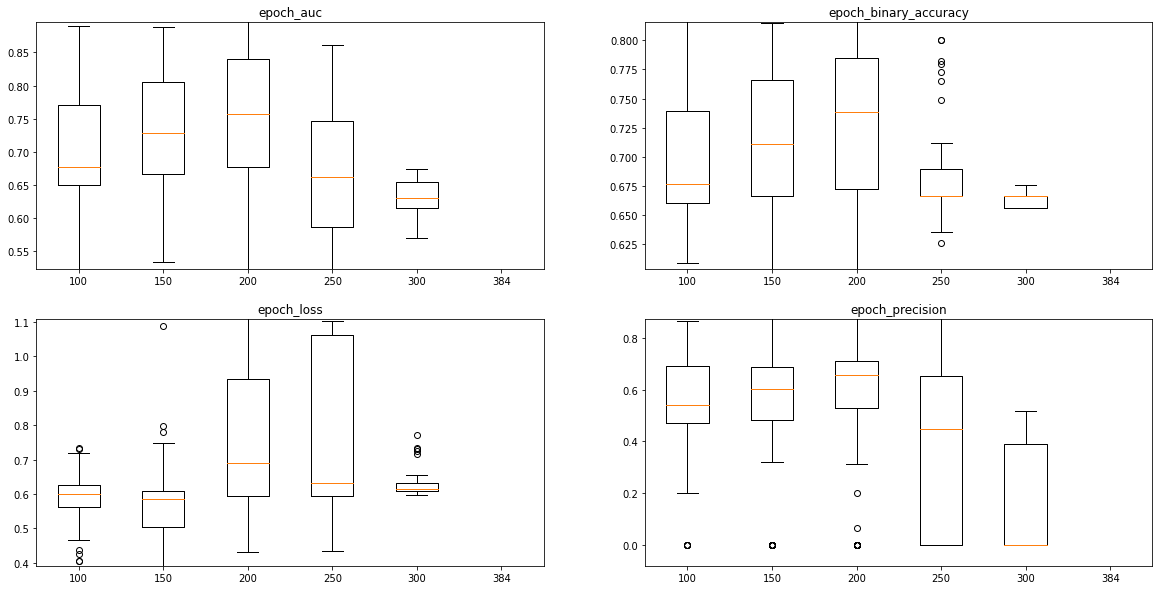

In [384]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20,10)

for i, ev in enumerate(['epoch_auc', 'epoch_binary_accuracy', 'epoch_loss', 'epoch_precision']):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    ax[x,y].boxplot([df_val[ev][df_val.fine == '100'], 
             df_val[ev][df_val.fine == '150'], 
             df_val[ev][df_val.fine == '200'],
             df_val[ev][df_val.fine == '250'],
             df_val[ev][df_val.fine == '300'],
            df_val[ev][df_val.fine == '385']], 
            labels = ['100', '150', '200', '250','300', '384'])
    q1, q3 = np.percentile(df_val[ev], [5, 95])
    r = q1-q3
    ax[x,y].set_ylim(q3+1.1*r, q1-1.1*r)
    ax[x,y].set_title(ev)

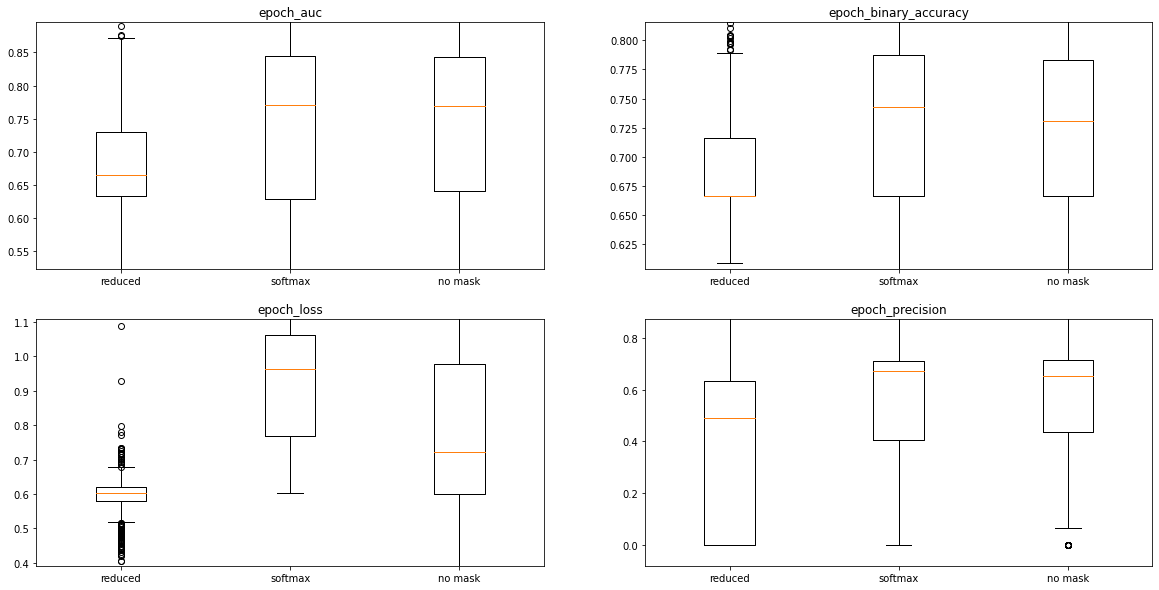

In [383]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20,10)

for i, ev in enumerate(['epoch_auc', 'epoch_binary_accuracy', 'epoch_loss', 'epoch_precision']):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    ax[x,y].boxplot([df_val[ev][df_val['reduced'] == 1], 
                     df_val[ev][df_val['softmax'] == 1],
                    df_val[ev][df_val['mask'] == 1]],
            labels = ['reduced', 'softmax', 'no mask'])
    q1, q3 = np.percentile(df_val[ev], [5, 95])
    r = q1-q3
    ax[x,y].set_ylim(q3+1.1*r, q1-1.1*r)
    ax[x,y].set_title(ev)

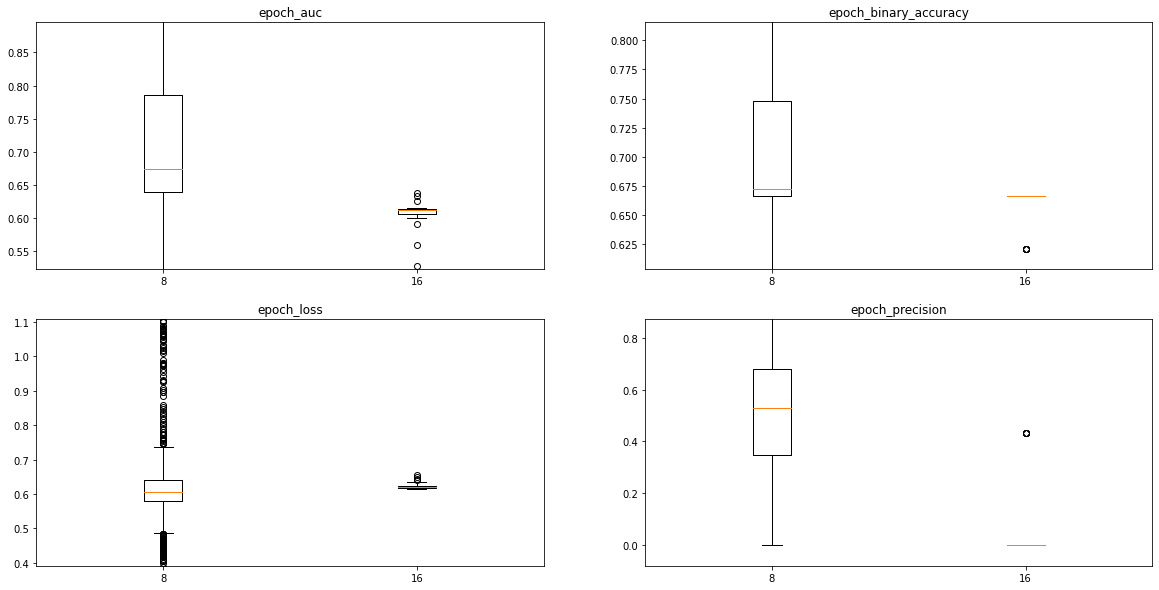

In [363]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20,10)

for i, ev in enumerate(['epoch_auc', 'epoch_binary_accuracy', 'epoch_loss', 'epoch_precision']):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    ax[x,y].boxplot([df_val[ev][df_val.batch == '8'], 
             df_val[ev][df_val.batch == '16']],
            labels = ['8', '16'])
    q1, q3 = np.percentile(df_val[ev], [5, 95])
    r = q1-q3
    ax[x,y].set_ylim(q3+1.1*r, q1-1.1*r)
    ax[x,y].set_title(ev)

In [ ]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10,10)

for i, ev in enumerate(['epoch_auc', 'epoch_binary_accuracy', 'epoch_loss', 'epoch_precision']):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    ax[x,y].boxplot([df_val[ev][df_val.batch == '8'], 
             df_val[ev][df_val.batch == '16']],
            labels = ['8', '16'])
    q1, q3 = np.percentile(df_val[ev], [5, 95])
    r = q1-q3
    ax[x,y].set_ylim(q3+1.1*r, q1-1.1*r)
    ax[x,y].set_title(ev)

In [301]:
np.unique(df_val['lr'])

array(['', '0001'], dtype=object)